In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('G:\\Downloads\\NSE-TATAGLOBAL11.csv')

data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [2]:
from sklearn.preprocessing import MinMaxScaler
Sc=MinMaxScaler(feature_range=(0,1))

In [3]:
# The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
# High, Low and Last represent the maximum, minimum, and last price of the share for the day.
# Total Trade Quantity is the number of shares bought or sold in the day and 
# Turnover (Lacs) is the turnover of the particular company on a given date.


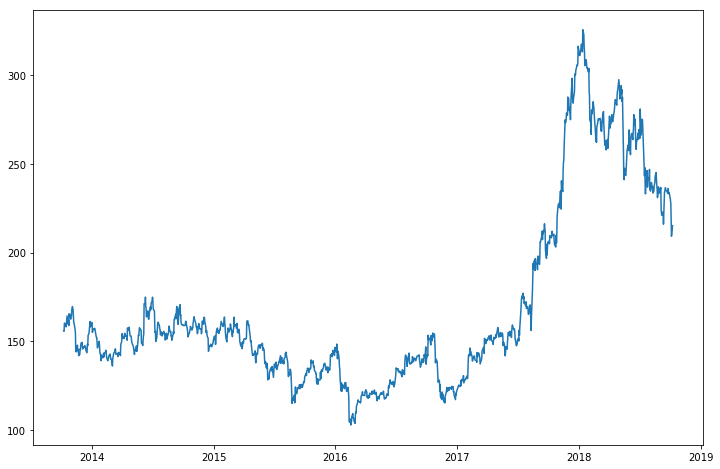

In [4]:
%matplotlib inline
data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.index=data['Date']
plt.figure(figsize=(12,8))

plt.plot(data['Close'],label='closing price history')

In [5]:
#feature engineering
from datetime import date
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day
data.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),year,month,day
Date,,,,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83,2018,10,8
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06,2018,10,5
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79,2018,10,4
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27,2018,10,3
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05,2018,10,1


In [6]:
iv=data[['year','month','day']]
dv=data['Close']

In [7]:
data['dayofweek']=data['Date'].dt.dayofweek

In [8]:
data['mon_fri']=0
for i in range(0,len(data)):
    if (data['dayofweek'][i]==4 or data['dayofweek'][i]==0):
        data['mon_fri'][i]=1
    else:
        data['mon_fri'][i]=0

C:\Users\Vijay\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Vijay\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

LR=LinearRegression()


In [10]:
iv_train,iv_test,dv_train,dv_test=train_test_split(iv,dv,random_state=0)

In [11]:
LR.fit(iv_train,dv_train)
y_pred_LR=LR.predict(iv_test)

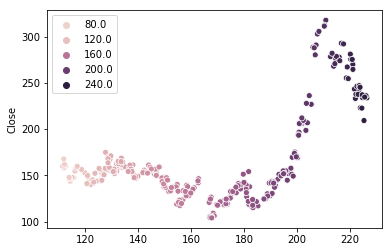

In [12]:
import seaborn as sns
sns.scatterplot(y_pred_LR,dv_test,hue=y_pred_LR)